<a href="https://colab.research.google.com/github/JPUG26/proyecto_Kaggle_Modelos_I/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - exploración


In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## Descargar datos directamente desde Kaggle

- Crear un archivo `kaggle.json` con su token de autenticación (en Kaggle, haga clic en el icono de usuario en la esquina superior derecha, en la configuración, en la API y cree un nuevo token).
- Subirlo a este espacio de trabajo del cuaderno.
- Ejecutar la siguiente celda.

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.11GB/s]


## Descomprimir e inspeccionar datos

In [4]:
!unzip udea*.zip > /dev/null

In [5]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


## Cargar datos de `train.csv` con pandas



In [47]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


In [48]:
z.head()

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


## Solo se usarán dos columnas

- La columna `RENDIMIENTO_GLOBAL` se generará utilizando el resto de las columnas.

- Usaremos las columnas:
  - `F_ESTRATOVIVIENDA`, que necesitaremos convertir a una **codificación onehot**
  - `E_HORASSEMANATRABAJA`, que necesitaremos convertir a una **codificación continua**

In [55]:
z = z[['F_ESTRATOVIVIENDA', 'E_HORASSEMANATRABAJA', 'RENDIMIENTO_GLOBAL']]
z.head()

,F_ESTRATOVIVIENDA,E_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL
0,Estrato 3,Menos de 10 horas,medio-alto
1,Estrato 3,0,bajo
2,Estrato 3,Más de 30 horas,bajo
3,Estrato 4,0,alto
4,Estrato 3,Entre 21 y 30 horas,medio-bajo


<Axes: xlabel='F_ESTRATOVIVIENDA'>

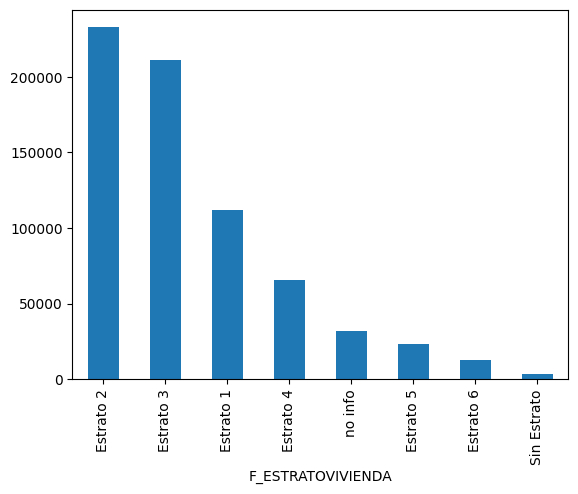

In [56]:
z.F_ESTRATOVIVIENDA.value_counts().plot(kind='bar')

<Axes: xlabel='E_HORASSEMANATRABAJA'>

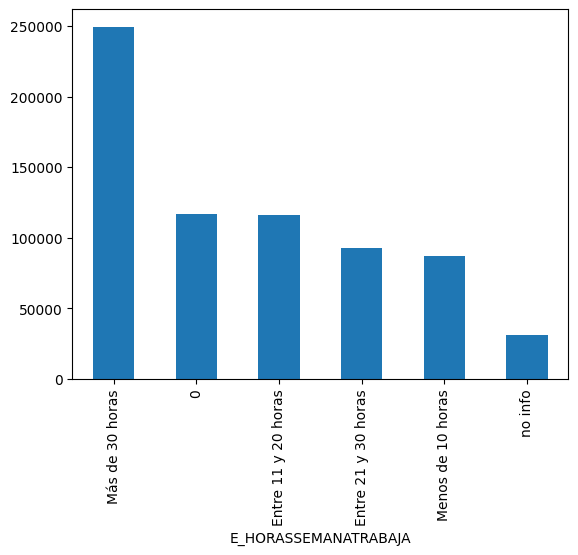

In [57]:
z.E_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

## Se inspecciona visualmente si estas dos columnas tienen un comportamiento distintivo con respecto a lo que queremos predecir.

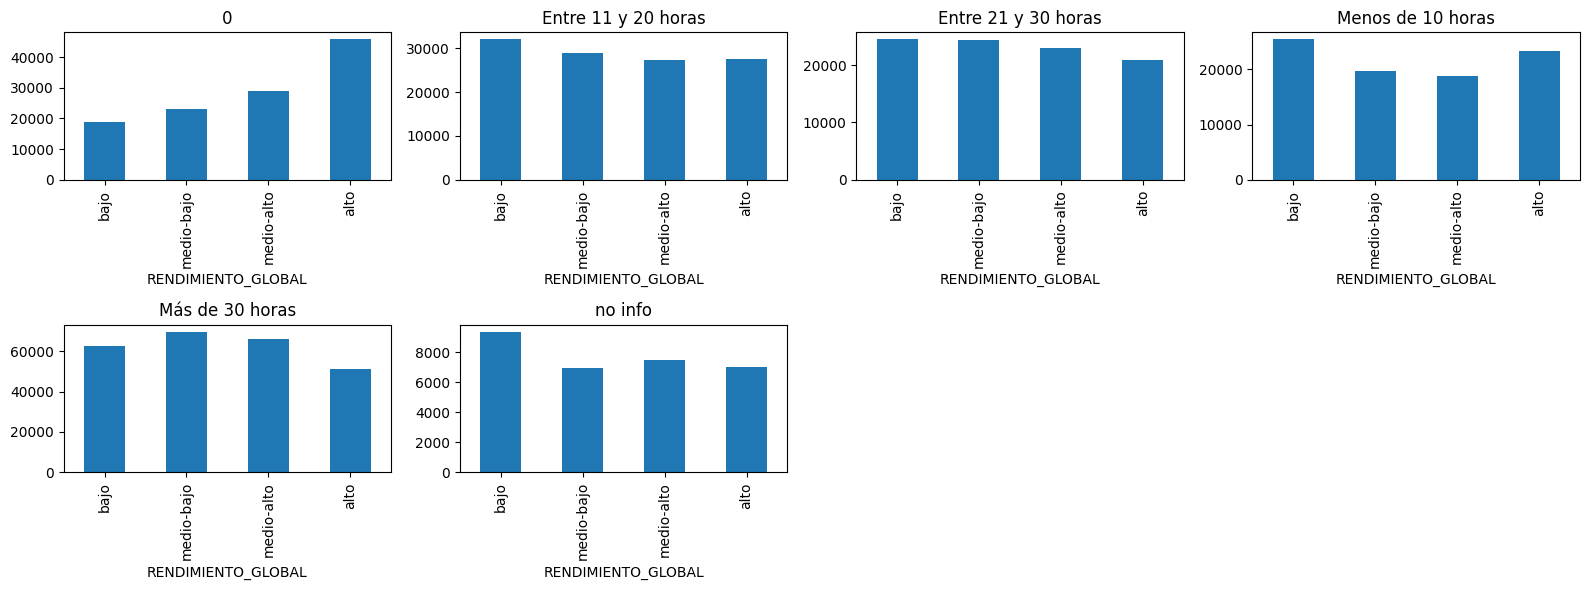

In [58]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.E_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.E_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

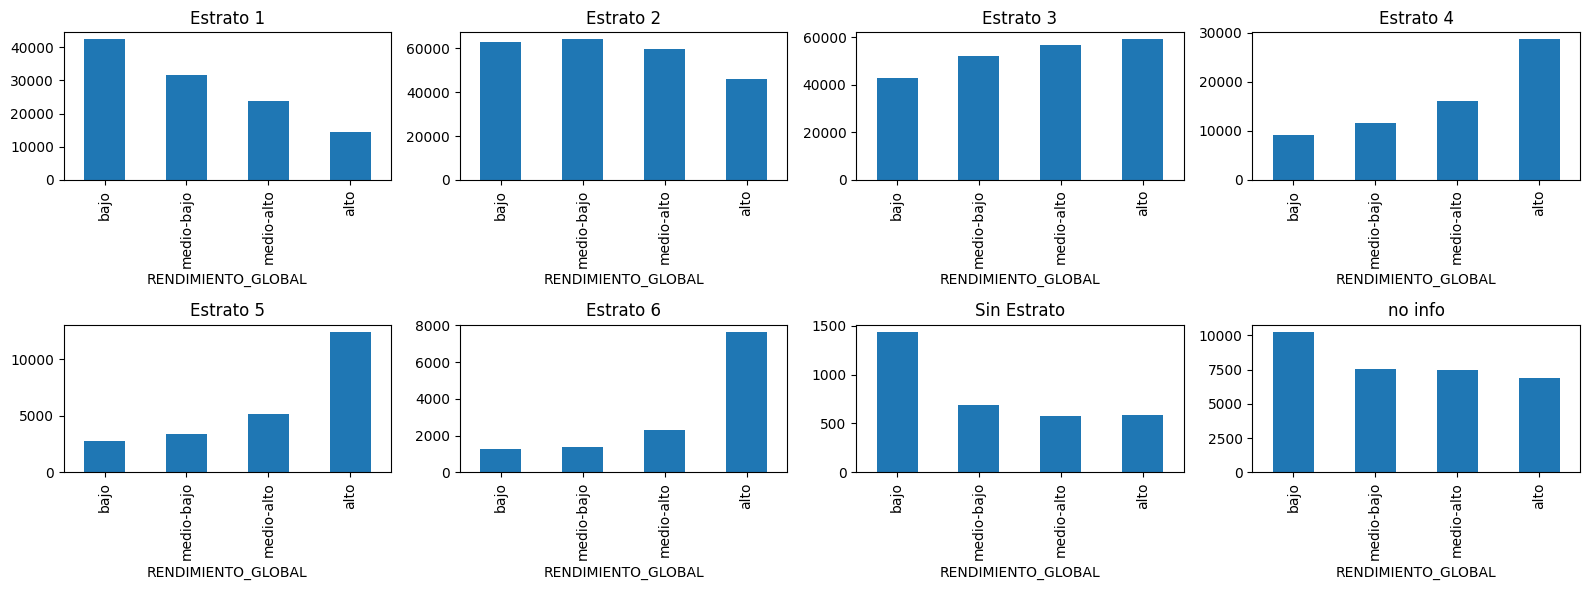

In [59]:
c = sorted(z.F_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.F_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

## Limpieza básica

Considerando que tenemos un total de 692 000 elementos de datos, tenemos relativamente pocos valores faltantes en cada columna

In [53]:
sum(z.F_ESTRATOVIVIENDA.isna()), sum(z.E_HORASSEMANATRABAJA.isna())

(32137, 30857)

Sustituiremos los valores `nan` con un símbolo preestablecido para marcarlos

In [54]:
z.F_ESTRATOVIVIENDA.values[z.F_ESTRATOVIVIENDA.isna()] = 'no info'
z.E_HORASSEMANATRABAJA.values[z.E_HORASSEMANATRABAJA.isna()] = 'no info'
sum(z.F_ESTRATOVIVIENDA.isna()), sum(z.E_HORASSEMANATRABAJA.isna())

(0, 0)

### Limpieza de `E_HORASSEMANATRABAJA`

Convertimos `E_HORASSEMANATRABAJA` a un valor **continuo**, ya que el orden tiene sentido y queremos que los modelos puedan capturarlo.

Observe que asignamos `sin información` a -1, lo cual es un tanto artificial en este caso.

In [60]:
cmap = {'Entre 11 y 20 horas': 15.5,
 'Menos de 10 horas': 5,
 'Más de 30 horas': 35,
 'Entre 21 y 30 horas': 21.5,
 '0': 0,
 'no info': -1}

z.E_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in z.E_HORASSEMANATRABAJA]]
z.E_HORASSEMANATRABAJA.value_counts()

,count
E_HORASSEMANATRABAJA,
35.0,249352
0.0,116550
15.5,115857
21.5,92693
5.0,87191
-1.0,30857


### Limpieza de `F_ESTRATOVIVIENDA`

Tener en cuenta que para `F_ESTRATOVIVIENDA` podría haber varias opciones para gestionar los datos faltantes:

- Dejar como está
- Unir `no info` y `Sin estrato` a en un solo símbolo

Se unirá en un solo valor `no info` y `Sin estrato`, para que no haya tantas columnas en la codificación one-hot

In [63]:
z = z.copy()
z.F_ESTRATOVIVIENDA = ['no info' if i in ['Sin estrato'] else i for i in z.F_ESTRATOVIVIENDA.values]

In [65]:
z.F_ESTRATOVIVIENDA.value_counts()

,count
F_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
no info,32137
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


Primero creamos el mapeo onehot

In [66]:
x = z.F_ESTRATOVIVIENDA.values
F_ESTRATOVIVIENDA_vals = sorted(np.unique(x))
F_ESTRATOVIVIENDA_onehot_vals = {val: np.eye(len(F_ESTRATOVIVIENDA_vals))[i] for i,val in enumerate(F_ESTRATOVIVIENDA_vals)}
F_ESTRATOVIVIENDA_onehot_vals

{'Estrato 1': array([1., 0., 0., 0., 0., 0., 0., 0.]),
 'Estrato 2': array([0., 1., 0., 0., 0., 0., 0., 0.]),
 'Estrato 3': array([0., 0., 1., 0., 0., 0., 0., 0.]),
 'Estrato 4': array([0., 0., 0., 1., 0., 0., 0., 0.]),
 'Estrato 5': array([0., 0., 0., 0., 1., 0., 0., 0.]),
 'Estrato 6': array([0., 0., 0., 0., 0., 1., 0., 0.]),
 'Sin Estrato': array([0., 0., 0., 0., 0., 0., 1., 0.]),
 'no info': array([0., 0., 0., 0., 0., 0., 0., 1.])}

In [67]:
F_ESTRATOVIVIENDA_onehot_enc = np.r_[[F_ESTRATOVIVIENDA_onehot_vals[i] for i in z.F_ESTRATOVIVIENDA]]
F_ESTRATOVIVIENDA_onehot_enc

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
F_ESTRATOVIVIENDA_df = pd.DataFrame(F_ESTRATOVIVIENDA_onehot_enc, columns=[f"F_ESTRATOVIVIENDA__{v}" for v in F_ESTRATOVIVIENDA_onehot_vals])
F_ESTRATOVIVIENDA_df

,F_ESTRATOVIVIENDA__Estrato 1,F_ESTRATOVIVIENDA__Estrato 2,F_ESTRATOVIVIENDA__Estrato 3,F_ESTRATOVIVIENDA__Estrato 4,F_ESTRATOVIVIENDA__Estrato 5,F_ESTRATOVIVIENDA__Estrato 6,F_ESTRATOVIVIENDA__Sin Estrato,F_ESTRATOVIVIENDA__no info
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
692495,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
692496,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se junta todo en un solo dataframe, eliminando la columna original `F_ESTRATOVIVIENDA`.

se tienen 8 columnas binarias a las que se le asigna un valor de 1 a solo una de ellas por cada fila, de acuerdo al estrato en el que se encuentre el estudiante.

In [69]:
z = pd.concat([F_ESTRATOVIVIENDA_df, z], axis=1).drop('F_ESTRATOVIVIENDA', axis=1)
z.shape

(692500, 10)

In [87]:
z.head()

,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA__Estrato 1,F_ESTRATOVIVIENDA__Estrato 2,F_ESTRATOVIVIENDA__Estrato 3,F_ESTRATOVIVIENDA__Estrato 4,F_ESTRATOVIVIENDA__Estrato 5,F_ESTRATOVIVIENDA__Estrato 6,F_ESTRATOVIVIENDA__Sin Estrato,F_ESTRATOVIVIENDA__no info,RENDIMIENTO_GLOBAL
0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,35.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
4,21.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


## Convertir la columna objetivo (predicción) en valores discretos.

Ahora los conjuntos de datos son **numéricos**!!!

In [71]:
y_col = 'RENDIMIENTO_GLOBAL'

rmap = {'alto': 3, 'bajo':0, 'medio-bajo':1, 'medio-alto':2}
z[y_col] = [rmap[i] for i in z[y_col]]
z.head()

,F_ESTRATOVIVIENDA__Estrato 1,F_ESTRATOVIVIENDA__Estrato 2,F_ESTRATOVIVIENDA__Estrato 3,F_ESTRATOVIVIENDA__Estrato 4,F_ESTRATOVIVIENDA__Estrato 5,F_ESTRATOVIVIENDA__Estrato 6,F_ESTRATOVIVIENDA__Sin Estrato,F_ESTRATOVIVIENDA__no info,E_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,21.5,1


## Se construye `X` e `y` para entrenar un modelo

Se ordenan las columnas para asegurarnos de que siempre tengan el mismo orden.

In [72]:
z = z[sorted(z.columns)]

X = z[[c for c in z.columns if c!=y_col]].values
y = z[y_col].values
X.shape, y.shape

((692500, 9), (692500,))

## Dividir en conjunto de entrenamiento y probar

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 9), (138500, 9), (554000,), (138500,))

## Crear un modelo lineal para la clasificación.

Entrenar modelo

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(Xtr, ytr)

LogisticRegression(max_iter=1000)

Obtener predicciones

In [77]:
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

In [78]:
print (preds_tr[:10])
print (preds_ts[:10])

[1 2 0 3 3 1 0 0 1 0]
[0 3 3 0 3 0 1 0 1 0]


Obtener matrices de precisión y confusión

In [79]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(np.float64(0.34185018050541516), np.float64(0.3396534296028881))

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# Normalizar por clase
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

Los valores de cada fila en la matriz de confusión suman 1 porque ha sido normalizada por fila y está mostrando proporciones en vez de conteos absolutos.

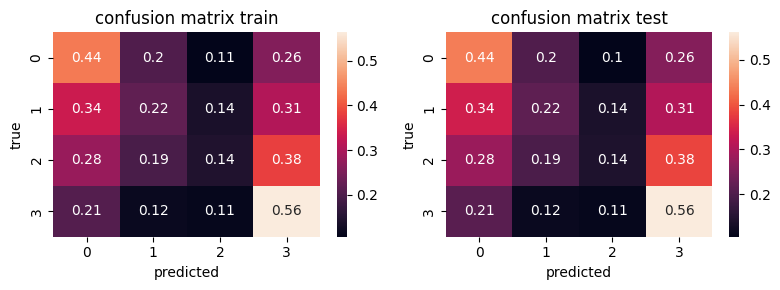

In [83]:
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

## ¿La columna `E_HORASSEMANATRABAJA` realmente contribuye?

Eliminarla y comparar los resultados.

In [88]:
zh = z[['E_HORASSEMANATRABAJA', y_col]]

X = zh[[c for c in zh.columns if c!=y_col]].values
y = zh[y_col].values
X.shape, y.shape

((692500, 1), (692500,))

In [89]:
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
lr_small = LogisticRegression()
lr_small.fit(Xtr, ytr)

LogisticRegression()

In [90]:
preds_tr = lr_small.predict(Xtr)
preds_ts = lr_small.predict(Xts)
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(np.float64(0.2857148014440433), np.float64(0.28341516245487364))

La columna si aporta, al combinar ambas columnas el rendimiento del modelo es mejor que solo usando la columna F_ESTRATOVIVIENDA

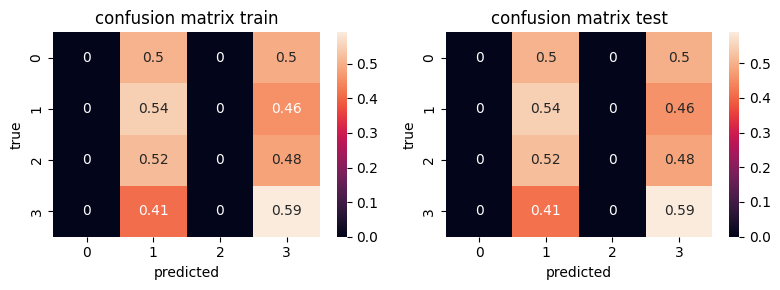

In [92]:
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

## Se mantiene el primer modelo; ahora aplicamos el mismo procedimiento a `test.csv`

Observación:
- No existe la columna `RENDIMIENTO_GLOBAL`
- Debemos conservar los ID para poder crear correctamente el archivo de envío

In [93]:
zt = pd.read_csv("test.csv")
zt

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260


In [94]:
zt_ids = zt['ID'].values
zt = zt[['E_HORASSEMANATRABAJA', 'F_ESTRATOVIVIENDA']]
print ("Dimensiones del DataFrame cargado", zt.shape)
zt.head()

Dimensiones del DataFrame cargado (296786, 2)


,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA
0,Menos de 10 horas,Estrato 3
1,Entre 21 y 30 horas,Estrato 2
2,0,Estrato 3
3,Entre 21 y 30 horas,Estrato 1
4,Entre 11 y 20 horas,Estrato 2


In [95]:
zt.F_ESTRATOVIVIENDA.values[zt.F_ESTRATOVIVIENDA.isna()] = 'no info'
zt.E_HORASSEMANATRABAJA.values[zt.E_HORASSEMANATRABAJA.isna()] = 'no info'


In [96]:
zt = zt.copy()
zt.E_HORASSEMANATRABAJA = np.r_[[cmap[i] for i in zt.E_HORASSEMANATRABAJA]]


In [97]:
zt.F_ESTRATOVIVIENDA = ['no info' if i in ['Sin estrato'] else i for i in zt.F_ESTRATOVIVIENDA.values]
F_ESTRATOVIVIENDA_onehot_enc = np.r_[[F_ESTRATOVIVIENDA_onehot_vals[i] for i in zt.F_ESTRATOVIVIENDA]]
F_ESTRATOVIVIENDA_df = pd.DataFrame(F_ESTRATOVIVIENDA_onehot_enc, columns=[f"F_ESTRATOVIVIENDA__{v}" for v in F_ESTRATOVIVIENDA_onehot_vals])
zt = pd.concat([F_ESTRATOVIVIENDA_df, zt], axis=1).drop('F_ESTRATOVIVIENDA', axis=1)
zt.shape

(296786, 9)

In [98]:
zt

,F_ESTRATOVIVIENDA__Estrato 1,F_ESTRATOVIVIENDA__Estrato 2,F_ESTRATOVIVIENDA__Estrato 3,F_ESTRATOVIVIENDA__Estrato 4,F_ESTRATOVIVIENDA__Estrato 5,F_ESTRATOVIVIENDA__Estrato 6,F_ESTRATOVIVIENDA__Sin Estrato,F_ESTRATOVIVIENDA__no info,E_HORASSEMANATRABAJA
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.5
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.5
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.5
...,...,...,...,...,...,...,...,...,...
296781,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0
296782,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
296783,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,35.0
296784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.5


create `X` array and predict

In [99]:
X_test_data = zt[sorted(zt.columns)].values
X_test_data.shape

(296786, 9)

In [100]:
preds_test_data = lr.predict(X_test_data)

## Preparar la entrega

Primero, convierte las predicciones de nuevo a sus valores textuales.

In [101]:
# Mapeo inverso
rmapi = {v:k for k,v in rmap.items()}
text_preds_test_data = [rmapi[i] for i in preds_test_data]


In [102]:
# crear dataframe

submission = pd.DataFrame([zt_ids, text_preds_test_data], index=['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,alto
1,98545,medio-bajo
2,499179,alto
3,782980,bajo
4,785185,bajo
...,...,...
296781,496981,bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


In [103]:
# Guardar archivo listo para entregar
submission.to_csv("my_submission.csv", index=False)

In [104]:
!head my_submission.csv

ID,RENDIMIENTO_GLOBAL
550236,alto
98545,medio-bajo
499179,alto
782980,bajo
785185,bajo
58495,bajo
705444,alto
557548,alto
519909,medio-bajo


In [105]:
submission.shape

(296786, 2)

## Send your submission to Kaggle

You must **join the competition** first

In [106]:
!kaggle competitions submit -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia -f my_submission.csv -m "Entrega actualizada Pablo Uribe de la exploración con modelo lineal"

100% 3.88M/3.88M [00:00<00:00, 8.20MB/s]
Successfully submitted to UDEA/ai4eng 20252 - Pruebas Saber Pro Colombia

Cosas que se pueden intentar

* Probar otros modelos (SVM, Random Forest, Gaussian, etc.).

* Usar diferentes parámetros en los modelos (como gamma para SVM, o max_depth para Random Forests). Consulta la documentación de cada modelo en sklearn.

* Aplicar diferentes métodos de preprocesamiento y limpieza para cada columna.

* Crear nuevas columnas manualmente, por ejemplo:

* Agrupar ESTU_PRGM_ACADEMICO en áreas de conocimiento (ingenierías, ciencias sociales, etc.).

* Realizar alguna operación entre columnas (multiplicar, concatenar, etc.).

* Integrar datos externos como nuevas columnas, por ejemplo, datos económicos de cada departamento de Colombia para cada año, etc.
